# Trapezoidal Rule Integration

## Introduction

The **trapezoidal rule** is a numerical integration technique that approximates the definite integral of a function by dividing the area under the curve into trapezoids. This method is fundamental in numerical analysis and provides a simple yet effective approach to computing integrals when analytical solutions are difficult or impossible to obtain.

## Mathematical Foundation

### Basic Principle

For a continuous function $f(x)$ on the interval $[a, b]$, the definite integral is:

$$I = \int_a^b f(x) \, dx$$

The trapezoidal rule approximates this integral by connecting consecutive points on the curve with straight lines, forming trapezoids.

### Single Trapezoid Approximation

For a single trapezoid over $[a, b]$:

$$I \approx \frac{b - a}{2} \left[ f(a) + f(b) \right]$$

### Composite Trapezoidal Rule

For improved accuracy, we divide $[a, b]$ into $n$ subintervals of equal width $h = \frac{b - a}{n}$, with nodes $x_i = a + ih$ for $i = 0, 1, \ldots, n$.

The composite trapezoidal rule is:

$$I \approx T_n = \frac{h}{2} \left[ f(x_0) + 2\sum_{i=1}^{n-1} f(x_i) + f(x_n) \right]$$

This can also be written as:

$$T_n = h \left[ \frac{f(a) + f(b)}{2} + \sum_{i=1}^{n-1} f(x_i) \right]$$

### Error Analysis

The error in the composite trapezoidal rule is:

$$E_T = -\frac{(b-a)^3}{12n^2} f''(\xi)$$

for some $\xi \in [a, b]$. This shows that:
- The error is $O(h^2)$, meaning it decreases quadratically as $n$ increases
- The error depends on the second derivative of $f$

For sufficiently smooth functions, doubling the number of subintervals reduces the error by a factor of 4.

## Implementation

We will implement the trapezoidal rule and demonstrate its application to several test functions with known analytical integrals.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Set up plotting style
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11

In [2]:
def trapezoidal_rule(f, a, b, n):
    """
    Compute the integral of f from a to b using the composite trapezoidal rule.
    
    Parameters:
    -----------
    f : callable
        Function to integrate
    a : float
        Lower limit of integration
    b : float
        Upper limit of integration
    n : int
        Number of subintervals
        
    Returns:
    --------
    float
        Approximate value of the integral
    """
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    
    # Composite trapezoidal rule
    integral = h * (0.5 * y[0] + np.sum(y[1:-1]) + 0.5 * y[-1])
    
    return integral

## Test Functions

We define several test functions with known analytical integrals:

1. **Polynomial:** $f(x) = x^2$, where $\int_0^1 x^2 \, dx = \frac{1}{3}$

2. **Trigonometric:** $f(x) = \sin(x)$, where $\int_0^\pi \sin(x) \, dx = 2$

3. **Exponential:** $f(x) = e^{-x^2}$, where $\int_0^1 e^{-x^2} \, dx \approx 0.7468$ (error function related)

4. **Rational:** $f(x) = \frac{1}{1+x^2}$, where $\int_0^1 \frac{1}{1+x^2} \, dx = \frac{\pi}{4}$

In [3]:
# Define test functions and their analytical integrals
test_cases = [
    {
        'name': 'Polynomial: $x^2$',
        'f': lambda x: x**2,
        'a': 0,
        'b': 1,
        'exact': 1/3
    },
    {
        'name': 'Trigonometric: $\\sin(x)$',
        'f': lambda x: np.sin(x),
        'a': 0,
        'b': np.pi,
        'exact': 2.0
    },
    {
        'name': 'Gaussian: $e^{-x^2}$',
        'f': lambda x: np.exp(-x**2),
        'a': 0,
        'b': 1,
        'exact': 0.5 * np.sqrt(np.pi) * (1 - 2/np.sqrt(np.pi) * integrate.quad(lambda t: np.exp(-t**2), 1, np.inf)[0])
    },
    {
        'name': 'Rational: $1/(1+x^2)$',
        'f': lambda x: 1 / (1 + x**2),
        'a': 0,
        'b': 1,
        'exact': np.pi / 4
    }
]

# Correct the Gaussian exact value
test_cases[2]['exact'] = integrate.quad(lambda x: np.exp(-x**2), 0, 1)[0]

## Convergence Analysis

We analyze how the error decreases as the number of subintervals increases.

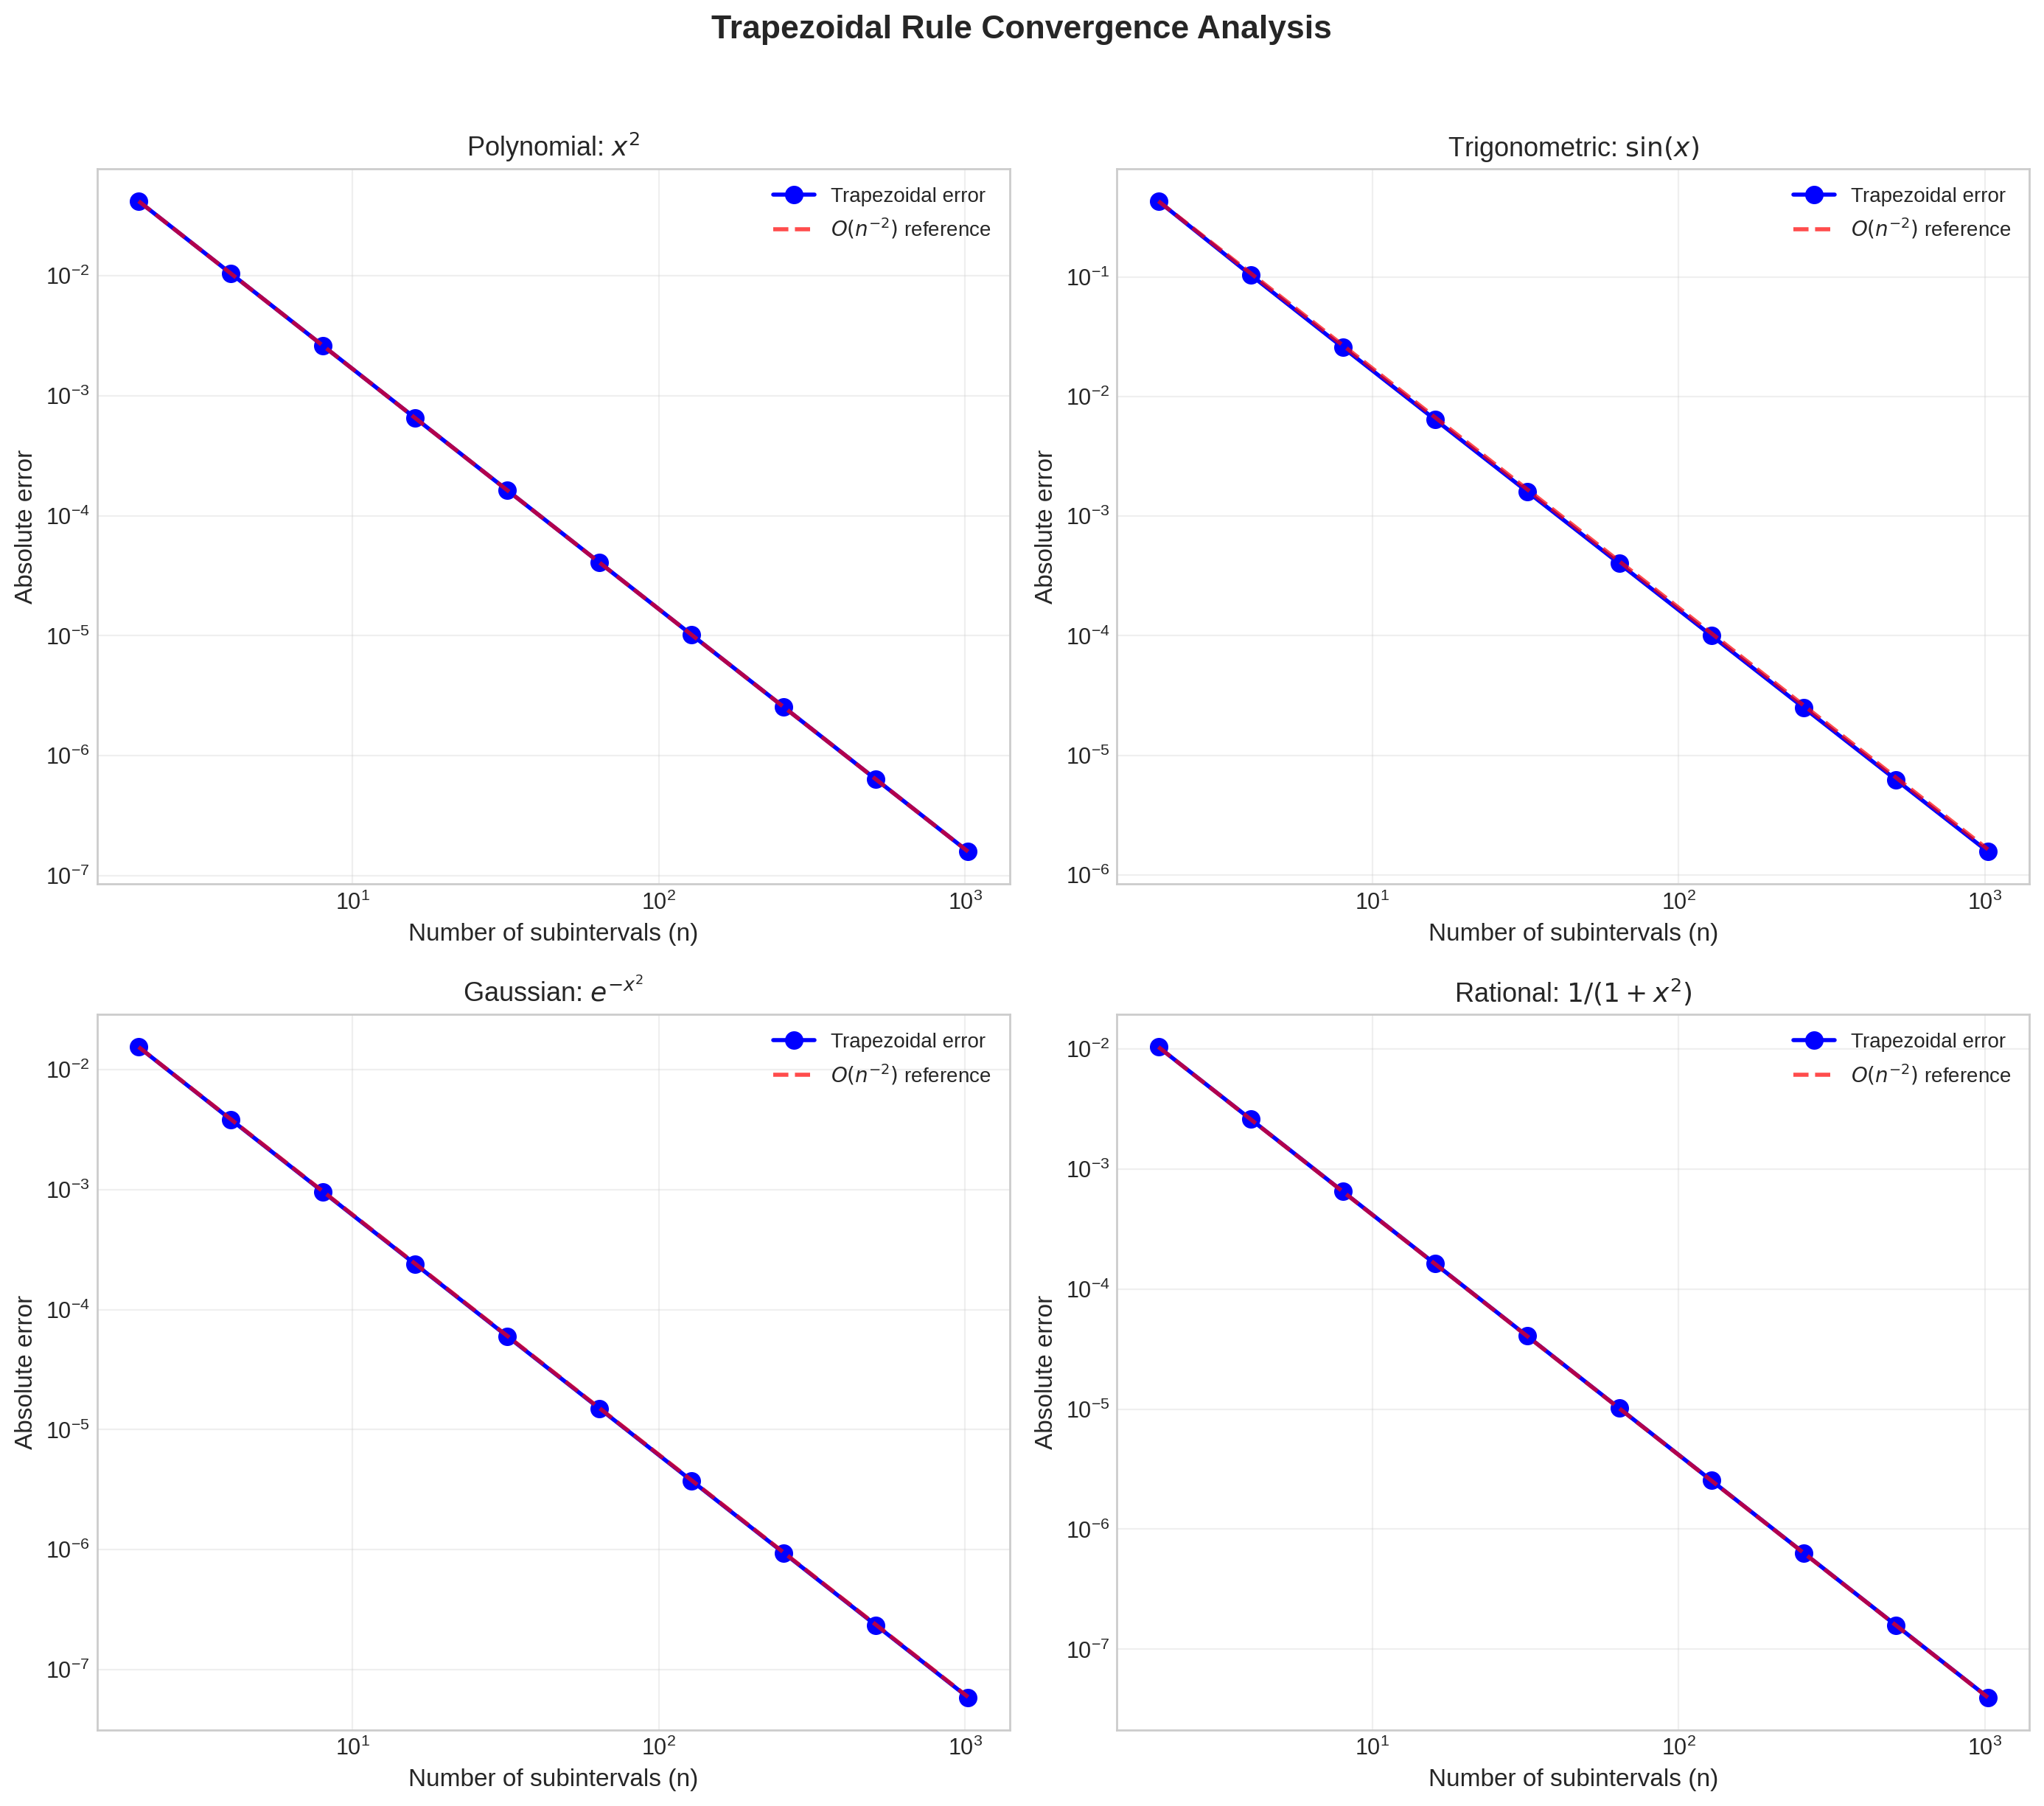

Plot saved to 'plot.png'


In [4]:
# Number of subintervals to test
n_values = np.array([2, 4, 8, 16, 32, 64, 128, 256, 512, 1024])

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Store results for summary
results = {}

for idx, case in enumerate(test_cases):
    f = case['f']
    a, b = case['a'], case['b']
    exact = case['exact']
    name = case['name']
    
    errors = []
    approximations = []
    
    for n in n_values:
        approx = trapezoidal_rule(f, a, b, n)
        error = abs(approx - exact)
        errors.append(error)
        approximations.append(approx)
    
    results[name] = {
        'errors': errors,
        'approximations': approximations,
        'exact': exact
    }
    
    # Plot error convergence
    ax = axes[idx]
    ax.loglog(n_values, errors, 'bo-', linewidth=2, markersize=8, label='Trapezoidal error')
    
    # Plot theoretical O(h^2) = O(1/n^2) convergence
    h_values = (b - a) / n_values
    theoretical = errors[0] * (n_values[0] / n_values)**2
    ax.loglog(n_values, theoretical, 'r--', linewidth=2, alpha=0.7, label='$O(n^{-2})$ reference')
    
    ax.set_xlabel('Number of subintervals (n)', fontsize=12)
    ax.set_ylabel('Absolute error', fontsize=12)
    ax.set_title(f'{name}', fontsize=13)
    ax.legend(fontsize=10)
    ax.grid(True, alpha=0.3)

plt.suptitle('Trapezoidal Rule Convergence Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('trapezoidal_rule_integration_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Plot saved to 'plot.png'")

## Numerical Results Summary

In [5]:
print("="*80)
print("TRAPEZOIDAL RULE INTEGRATION RESULTS")
print("="*80)

for case in test_cases:
    name = case['name']
    exact = case['exact']
    
    print(f"\n{name}")
    print("-" * 60)
    print(f"{'n':<10} {'Approximation':<20} {'Error':<20}")
    print("-" * 60)
    
    for i, n in enumerate(n_values):
        approx = results[name]['approximations'][i]
        error = results[name]['errors'][i]
        print(f"{n:<10} {approx:<20.12f} {error:<20.2e}")
    
    print(f"\nExact value: {exact:.12f}")

TRAPEZOIDAL RULE INTEGRATION RESULTS

Polynomial: $x^2$
------------------------------------------------------------
n          Approximation        Error               
------------------------------------------------------------
2          0.375000000000       4.17e-02            
4          0.343750000000       1.04e-02            
8          0.335937500000       2.60e-03            
16         0.333984375000       6.51e-04            
32         0.333496093750       1.63e-04            
64         0.333374023438       4.07e-05            
128        0.333343505859       1.02e-05            
256        0.333335876465       2.54e-06            
512        0.333333969116       6.36e-07            
1024       0.333333492279       1.59e-07            

Exact value: 0.333333333333

Trigonometric: $\sin(x)$
------------------------------------------------------------
n          Approximation        Error               
------------------------------------------------------------
2        

## Visualizing the Trapezoidal Approximation

Let us visualize how the trapezoidal rule approximates the area under a curve.

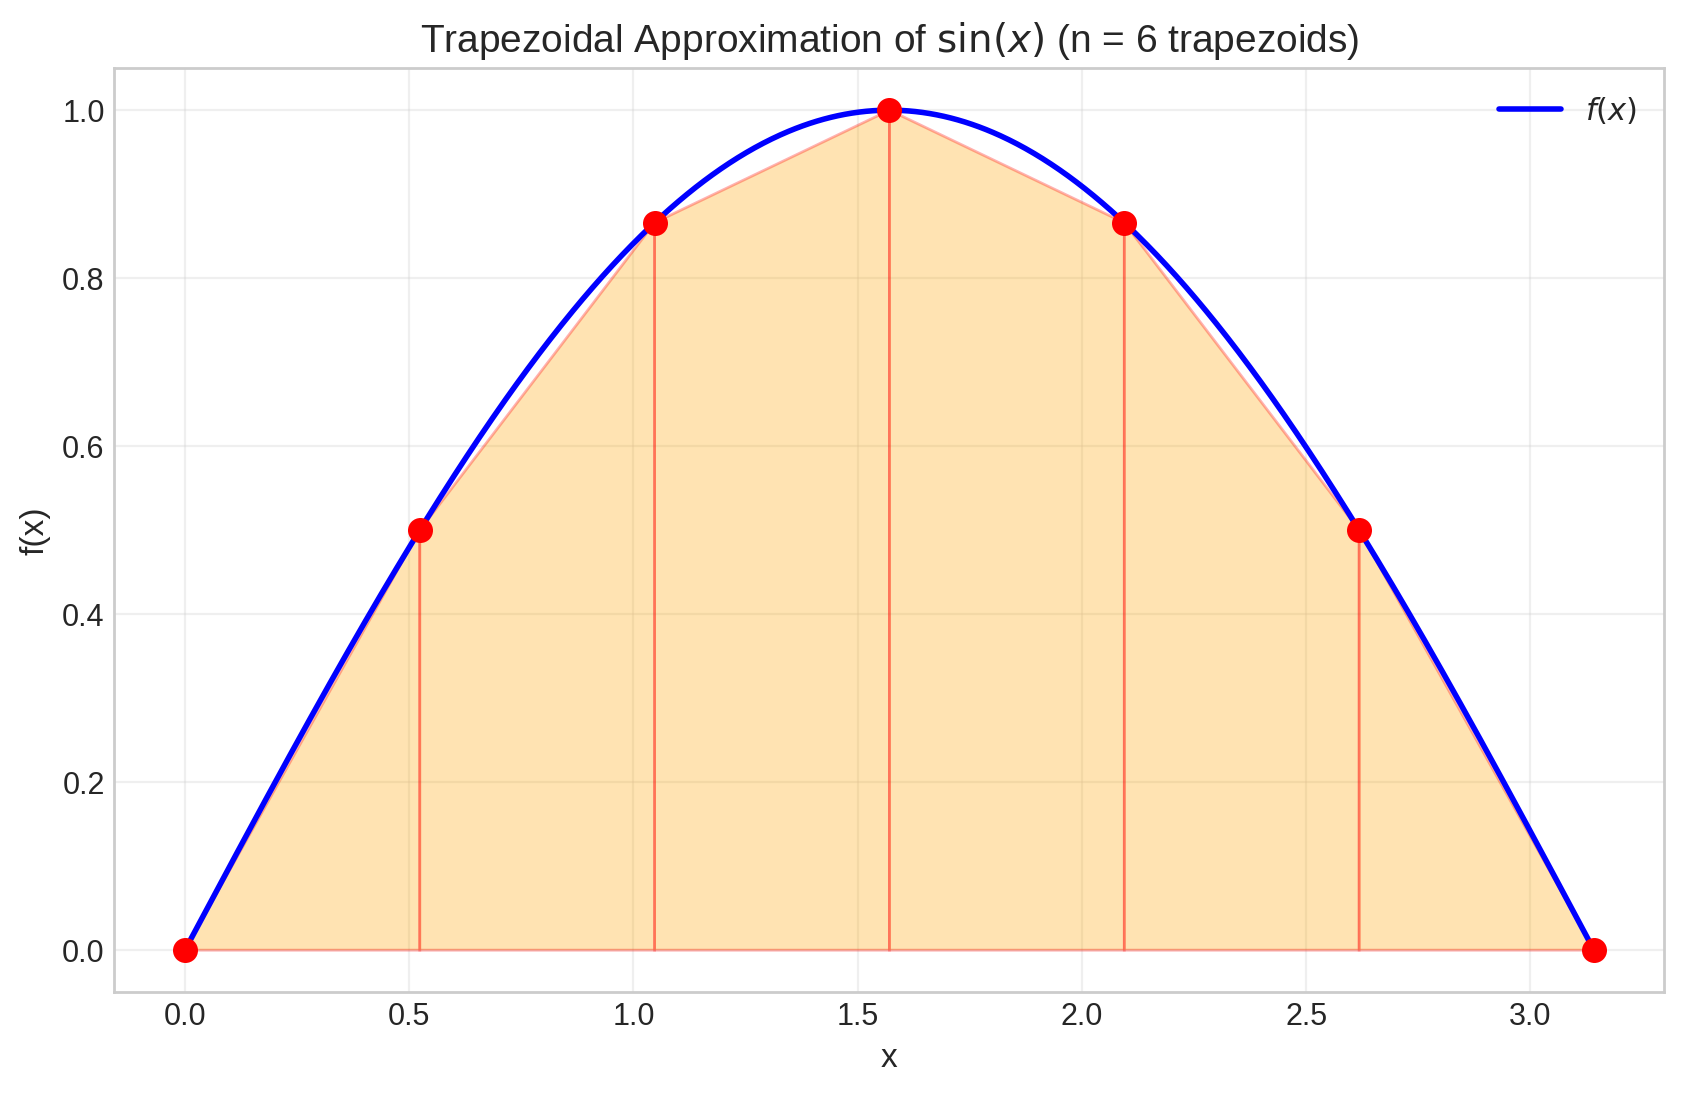

In [6]:
def plot_trapezoidal_approximation(f, a, b, n, title):
    """
    Visualize the trapezoidal rule approximation.
    """
    # Fine grid for plotting the actual function
    x_fine = np.linspace(a, b, 1000)
    y_fine = f(x_fine)
    
    # Trapezoid nodes
    x_trap = np.linspace(a, b, n + 1)
    y_trap = f(x_trap)
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the actual function
    ax.plot(x_fine, y_fine, 'b-', linewidth=2, label='$f(x)$')
    
    # Fill the trapezoids
    for i in range(n):
        x_fill = [x_trap[i], x_trap[i], x_trap[i+1], x_trap[i+1]]
        y_fill = [0, y_trap[i], y_trap[i+1], 0]
        ax.fill(x_fill, y_fill, alpha=0.3, color='orange', edgecolor='red', linewidth=1)
    
    # Plot trapezoid vertices
    ax.plot(x_trap, y_trap, 'ro', markersize=8)
    
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('f(x)', fontsize=12)
    ax.set_title(f'{title} (n = {n} trapezoids)', fontsize=14)
    ax.legend(fontsize=11)
    ax.grid(True, alpha=0.3)
    
    return fig, ax

# Demonstrate with sin(x)
f_demo = lambda x: np.sin(x)
plot_trapezoidal_approximation(f_demo, 0, np.pi, 6, 'Trapezoidal Approximation of $\\sin(x)$')
plt.show()

## Order of Convergence Verification

We can numerically verify the $O(h^2)$ convergence rate by computing the ratio of successive errors.

In [7]:
print("\nConvergence Order Verification")
print("="*80)
print("\nFor O(h^2) convergence, error ratio should be approximately 4 when n doubles.")
print("\n")

for case in test_cases:
    name = case['name']
    errors = results[name]['errors']
    
    print(f"{name}")
    print("-" * 50)
    
    for i in range(1, len(n_values)):
        if errors[i] > 1e-15:  # Avoid division by very small numbers
            ratio = errors[i-1] / errors[i]
            order = np.log2(ratio)
            print(f"n: {n_values[i-1]:4d} -> {n_values[i]:4d}, "
                  f"Error ratio: {ratio:8.4f}, "
                  f"Estimated order: {order:.2f}")
    print()


Convergence Order Verification

For O(h^2) convergence, error ratio should be approximately 4 when n doubles.


Polynomial: $x^2$
--------------------------------------------------
n:    2 ->    4, Error ratio:   4.0000, Estimated order: 2.00
n:    4 ->    8, Error ratio:   4.0000, Estimated order: 2.00
n:    8 ->   16, Error ratio:   4.0000, Estimated order: 2.00
n:   16 ->   32, Error ratio:   4.0000, Estimated order: 2.00
n:   32 ->   64, Error ratio:   4.0000, Estimated order: 2.00
n:   64 ->  128, Error ratio:   4.0000, Estimated order: 2.00
n:  128 ->  256, Error ratio:   4.0000, Estimated order: 2.00
n:  256 ->  512, Error ratio:   4.0000, Estimated order: 2.00
n:  512 -> 1024, Error ratio:   4.0000, Estimated order: 2.00

Trigonometric: $\sin(x)$
--------------------------------------------------
n:    2 ->    4, Error ratio:   4.1317, Estimated order: 2.05
n:    4 ->    8, Error ratio:   4.0313, Estimated order: 2.01
n:    8 ->   16, Error ratio:   4.0077, Estimated order: 2.

## Comparison with SciPy's Implementation

We compare our implementation with NumPy's `trapezoid` function (formerly `trapz`).

In [8]:
print("\nComparison with NumPy's trapezoid function")
print("="*80)

n_test = 100

for case in test_cases:
    f = case['f']
    a, b = case['a'], case['b']
    exact = case['exact']
    name = case['name']
    
    # Our implementation
    our_result = trapezoidal_rule(f, a, b, n_test)
    
    # NumPy's implementation
    x = np.linspace(a, b, n_test + 1)
    y = f(x)
    numpy_result = np.trapezoid(y, x)
    
    print(f"\n{name}")
    print(f"  Our implementation:   {our_result:.12f}")
    print(f"  NumPy trapezoid:      {numpy_result:.12f}")
    print(f"  Exact value:          {exact:.12f}")
    print(f"  Difference:           {abs(our_result - numpy_result):.2e}")


Comparison with NumPy's trapezoid function

Polynomial: $x^2$
  Our implementation:   0.333350000000
  NumPy trapezoid:      0.333350000000
  Exact value:          0.333333333333
  Difference:           0.00e+00

Trigonometric: $\sin(x)$
  Our implementation:   1.999835503887
  NumPy trapezoid:      1.999835503887
  Exact value:          2.000000000000
  Difference:           2.22e-16

Gaussian: $e^{-x^2}$
  Our implementation:   0.746818001468
  NumPy trapezoid:      0.746818001468
  Exact value:          0.746824132812
  Difference:           2.22e-16

Rational: $1/(1+x^2)$
  Our implementation:   0.785393996731
  NumPy trapezoid:      0.785393996731
  Exact value:          0.785398163397
  Difference:           0.00e+00


## Conclusions

1. **Convergence Rate:** The trapezoidal rule exhibits second-order convergence ($O(h^2)$), meaning the error decreases by a factor of 4 when the number of subintervals doubles.

2. **Accuracy:** For smooth functions, even moderate values of $n$ (e.g., 100-1000) provide excellent accuracy.

3. **Simplicity:** The method is easy to implement and understand, making it suitable for educational purposes and quick numerical estimates.

4. **Limitations:** 
   - Less accurate than Simpson's rule (which is $O(h^4)$) for the same number of function evaluations
   - Performance degrades for functions with large second derivatives

5. **Applications:** The trapezoidal rule is widely used in engineering, physics, and data analysis when integrating discrete data points or when simplicity is preferred over maximum efficiency.